In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')

train_data.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


In [19]:
train_data.describe()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,750000.000000,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,374999.500000,64.504738,59.859901,52.236449,1.348855,45.437406
std,216506.495284,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000
25%,187499.750000,35.730000,39.410000,28.380000,0.000000,23.178350
50%,374999.500000,63.840000,60.050000,53.580000,1.000000,43.379460
75%,562499.250000,94.070000,79.530000,76.600000,2.000000,64.811580
max,749999.000000,325.240000,119.460000,119.910000,103.910000,119.970000


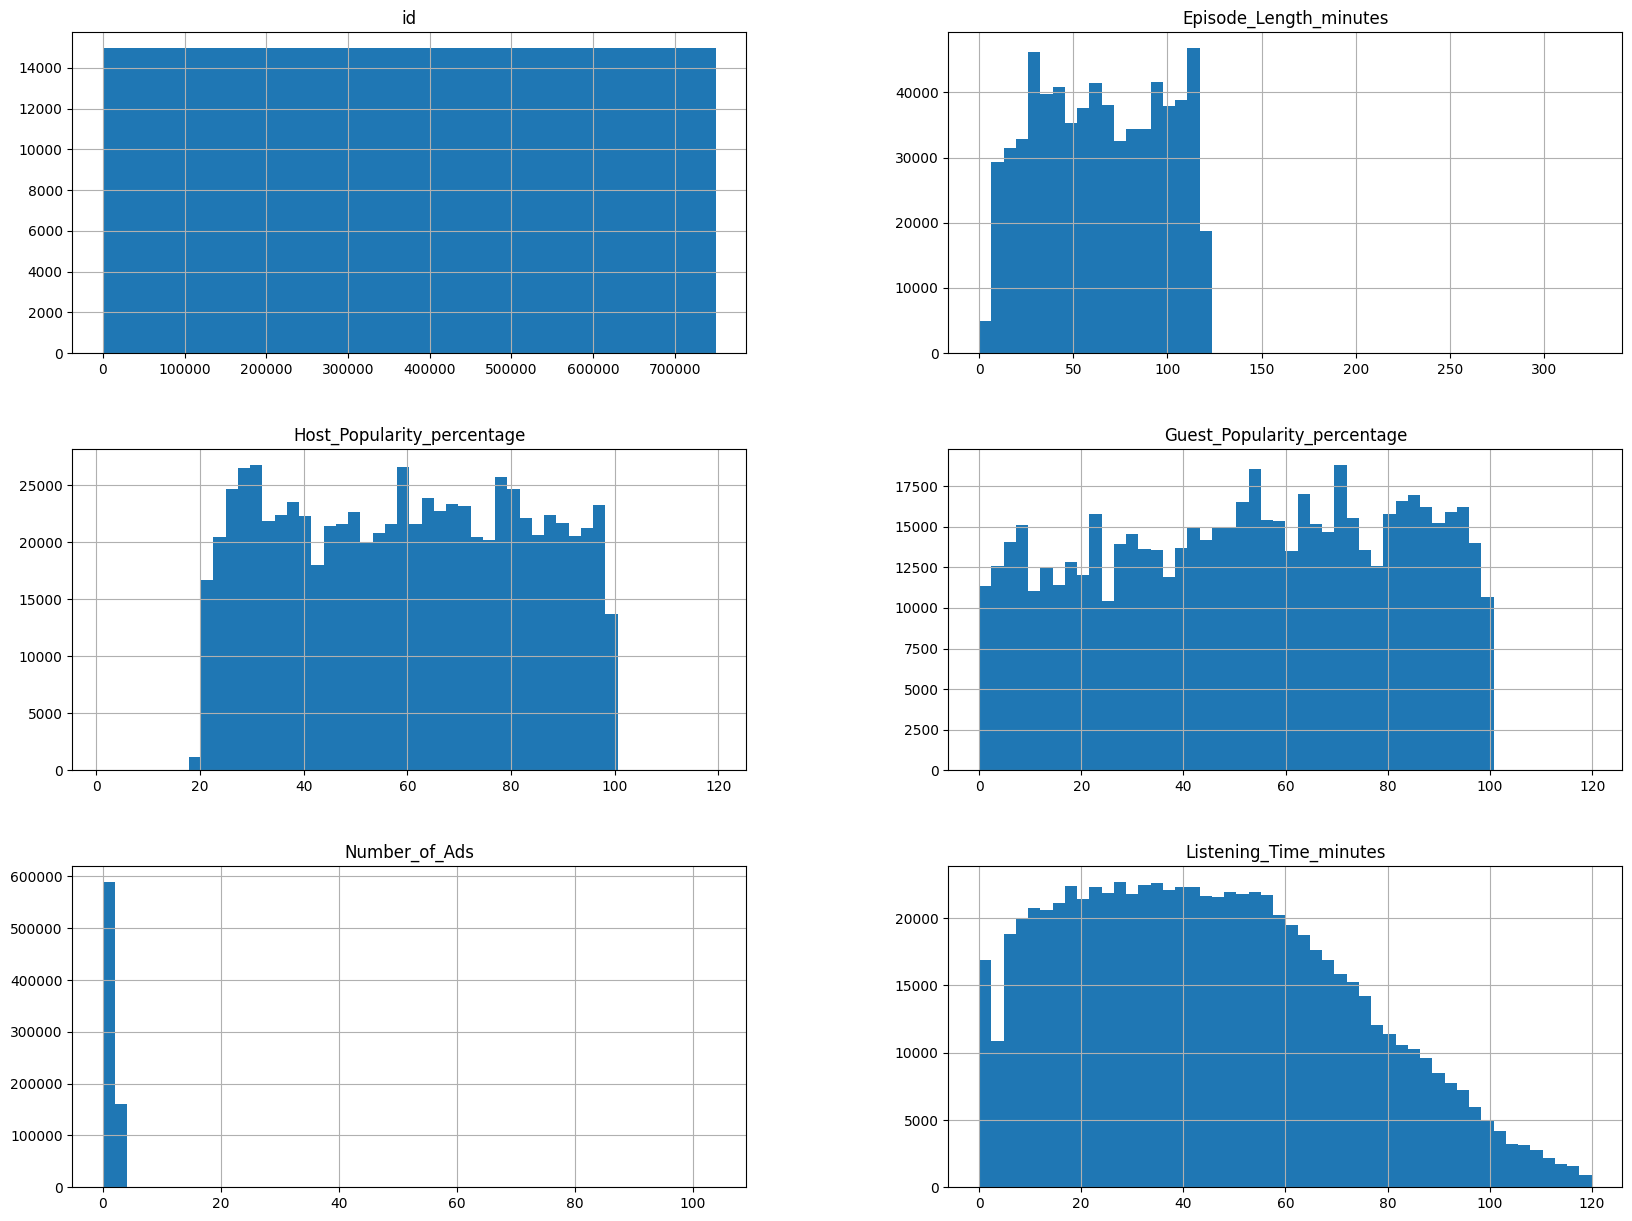

In [20]:
import matplotlib.pyplot as plt

train_data.hist(bins=50, figsize=(20, 15))
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(train_data, test_size=0.2, random_state=42)
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600000 entries, 453635 to 121958
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           600000 non-null  int64  
 1   Podcast_Name                 600000 non-null  object 
 2   Episode_Title                600000 non-null  object 
 3   Episode_Length_minutes       530372 non-null  float64
 4   Genre                        600000 non-null  object 
 5   Host_Popularity_percentage   600000 non-null  float64
 6   Publication_Day              600000 non-null  object 
 7   Publication_Time             600000 non-null  object 
 8   Guest_Popularity_percentage  483107 non-null  float64
 9   Number_of_Ads                599999 non-null  float64
 10  Episode_Sentiment            600000 non-null  object 
 11  Listening_Time_minutes       600000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 59.5+ MB


In [22]:
podcast_name_cat = train_set['Podcast_Name']
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
podcast_name_cat_1hot = encoder.fit_transform(podcast_name_cat.values.reshape(-1, 1))
podcast_name_cat_1hot.toarray()


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X


num_pipline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler()),       
])

train_new = train_data.drop(["Listening_Time_minutes","Podcast_Name", "Episode_Title", "Genre", "Publication_Day", "Publication_Time", "Episode_Sentiment"], axis=1)
num_attribs = list(train_new)
cat_attribs = ["Podcast_Name", "Episode_Title", "Genre", "Publication_Day", "Publication_Time", "Episode_Sentiment"]
full_pipeline = ColumnTransformer([
    ("num", num_pipline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

train_prepared = full_pipeline.fit_transform(train_data)

In [24]:
train_prepared

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8250000 stored elements and shape (750000, 177)>

In [25]:
train = train_data.drop("Listening_Time_minutes", axis=1)
train_labels = train_data["Listening_Time_minutes"].copy()

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_prepared, train_labels)

LinearRegression()

In [26]:
test_prepared = full_pipeline.fit_transform(test_data)

In [27]:
prediction = lin_reg.predict(test_prepared)

In [28]:
output = pd.DataFrame({'id': test_data['id'], 'Prediction': prediction})
output.to_csv('lin_reg.csv', index=False)

In [29]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=10, random_state=42)
tree_reg.fit(train_prepared, train_labels)
tree_reg.predict(test_prepared)

output = pd.DataFrame({'id': test_data['id'], 'Prediction': prediction})
output.to_csv('tree_reg.csv', index=False)

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

forest_reg = RandomForestRegressor(
    bootstrap=True,
    criterion='friedman_mse',
    max_features=6,
    max_depth=15,  # Increased for better performance
    max_leaf_nodes=None,
    min_samples_split=2,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    n_estimators=30,  # Adjust if processing time is too long
    n_jobs=-1,  # Utilize all available CPU cores
    oob_score=False,
    random_state=42,  # Ensures reproducibility
    verbose=1,  # Prints progress
    warm_start=False
)

# Fit the model
forest_reg.fit(train_prepared, train_labels)

# Predict on test data
prediction = forest_reg.predict(test_prepared)

forest_mse = mean_squared_error(train_labels, forest_reg.predict(train_prepared))
forest_rmse = np.sqrt(forest_mse)
print("RMSE:", forest_rmse)


# Debugging: Check output shape
print("Prediction shape:", prediction.shape)

# Ensure 'id' column exists in test_data
if 'id' in test_data.columns:
    output = pd.DataFrame({'id': test_data['id'], 'Prediction': prediction})
    output.to_csv('forest_reg.csv', index=False)
    print("Prediction saved successfully to 'forest_reg.csv'")
else:
    print("Error: 'id' column not found in test_data")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.7min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    1.7s finished


RMSE: 20.38159915639908
Prediction shape: (250000,)
Prediction saved successfully to 'forest_reg.csv'


In [31]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

# Normalize the data (important for neural networks)
scaler = StandardScaler(with_mean=False)
train_prepared_scaled = scaler.fit_transform(train_prepared)
test_prepared_scaled = scaler.transform(test_prepared)

# Define a simple neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_prepared.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer for regression (1 neuron)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
model.fit(train_prepared_scaled, train_labels, epochs=10, batch_size=32, verbose=1)

# Predict on test data
predictions = model.predict(test_prepared_scaled)

# Save predictions
if 'id' in test_data.columns:
    output = pd.DataFrame({'id': test_data['id'], 'Prediction': predictions.flatten()})
    output.to_csv('tensorflow_predictions.csv', index=False)
    print("Predictions saved successfully to 'tensorflow_predictions.csv'")
else:
    print("Error: 'id' column not found in test_data")


/home/bee/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
23438/23438 ━━━━━━━━━━━━━━━━━━━━ 183s 8ms/step - loss: 244.0919 - mae: 11.1482
Epoch 2/10
23438/23438 ━━━━━━━━━━━━━━━━━━━━ 177s 8ms/step - loss: 178.4129 - mae: 9.7811
Epoch 3/10
23438/23438 ━━━━━━━━━━━━━━━━━━━━ 180s 8ms/step - loss: 176.4953 - mae: 9.7226
Epoch 4/10
23438/23438 ━━━━━━━━━━━━━━━━━━━━ 179s 8ms/step - loss: 176.3672 - mae: 9.7077
Epoch 5/10
23438/23438 ━━━━━━━━━━━━━━━━━━━━ 181s 8ms/step - loss: 175.5882 - mae: 9.6840
Epoch 6/10
23438/23438 ━━━━━━━━━━━━━━━━━━━━ 181s 8ms/step - loss: 173.9809 - mae: 9.6312
Epoch 7/10
23438/23438 ━━━━━━━━━━━━━━━━━━━━ 182s 8ms/step - loss: 174.4177 - mae: 9.6498
Epoch 8/10
23438/23438 ━━━━━━━━━━━━━━━━━━━━ 205s 8ms/step - loss: 174.0378 - mae: 9.6262
Epoch 9/10
23438/23438 ━━━━━━━━━━━━━━━━━━━━ 188s 8ms/step - loss: 173.5799 - mae: 9.6196
Epoch 10/10
23438/23438 ━━━━━━━━━━━━━━━━━━━━ 187s 8ms/step - loss: 172.4334 - mae: 9.5925
7813/7813 ━━━━━━━━━━━━━━━━━━━━ 48s 6ms/step
Predictions saved successfully to 'tensorflow_predictions.csv'


In [36]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import RobustScaler

# Preprocess Data (Better Scaling)
scaler = RobustScaler(with_centering=False)
train_prepared_scaled = scaler.fit_transform(train_prepared)
test_prepared_scaled = scaler.transform(test_prepared)

# Define Optimized Model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(train_prepared.shape[1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

# Compile with Better Optimizer
model.compile(optimizer='nadam', loss='mse', metrics=['mae'])

# Learning Rate Adjustment
lr_schedule = keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, min_lr=1e-6)

# Early Stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the Model
model.fit(train_prepared_scaled, train_labels, 
          epochs=100, batch_size=256, 
          validation_split=0.2, 
          callbacks=[early_stopping, lr_schedule], verbose=1)

# Predict
predictions = model.predict(test_prepared_scaled)

# Save Predictions
if 'id' in test_data.columns:
    output = pd.DataFrame({'id': test_data['id'], 'Prediction': predictions.flatten()})
    output.to_csv('tensorflow_predictions_optimized.csv', index=False)
    print("Predictions saved to 'tensorflow_predictions_optimized.csv'")
else:
    print("Error: 'id' column not found in test_data")

/home/bee/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 52s 19ms/step - loss: 672.2631 - mae: 18.0372 - val_loss: 175.8376 - val_mae: 9.6748 - learning_rate: 0.0010
Epoch 2/100
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - loss: 182.7189 - mae: 9.9050 - val_loss: 175.0153 - val_mae: 9.6602 - learning_rate: 0.0010
Epoch 3/100
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - loss: 179.8471 - mae: 9.8439 - val_loss: 174.6748 - val_mae: 9.6477 - learning_rate: 0.0010
Epoch 4/100
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - loss: 177.4613 - mae: 9.7841 - val_loss: 174.0761 - val_mae: 9.6139 - learning_rate: 0.0010
Epoch 5/100
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - loss: 176.8279 - mae: 9.7453 - val_loss: 174.2178 - val_mae: 9.6282 - learning_rate: 0.0010
Epoch 6/100
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - loss: 176.5671 - mae: 9.7289 - val_loss: 174.7884 - val_mae: 9.6085 - learning_rate: 0.0010
Epoch 7/100
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 44s 19ms/step - loss: 175.0986 - mae: 9.6842 - val